In [1]:
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
import glob
import time
from math import sqrt

In [2]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, mean_squared_error #, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
import myMLfunctions
import myFunctions

In [4]:
pd.set_option("display.max_columns", None)
random.seed(1)

# data

In [5]:
df = pd.read_excel('practicum_data2.xlsx')
#df

In [6]:
# add an industry column just for the existing code ro run without modifications. This will have no impact
industry_value = 'INDUSTRY'
df['INDUSTRY'] = industry_value

In [7]:
df

,DATE,ID,Target,RET1M,1M_S5COND,3M_S5COND,6M_S5COND,12M_S5COND,1M_S5CONS,3M_S5CONS,6M_S5CONS,12M_S5CONS,1M_S5ENRS,3M_S5ENRS,6M_S5ENRS,12M_S5ENRS,1M_S5FINL,3M_S5FINL,6M_S5FINL,12M_S5FINL,1M_S5HLTH,3M_S5HLTH,6M_S5HLTH,12M_S5HLTH,1M_S5INDU,3M_S5INDU,6M_S5INDU,12M_S5INDU,1M_S5INFT,3M_S5INFT,6M_S5INFT,12M_S5INFT,1M_S5MATR,3M_S5MATR,6M_S5MATR,12M_S5MATR,1M_S5RLST,3M_S5RLST,6M_S5RLST,12M_S5RLST,1M_S5TELS,3M_S5TELS,6M_S5TELS,12M_S5TELS,1M_S5UTIL,3M_S5UTIL,6M_S5UTIL,12M_S5UTIL,INDUSTRY
0,20040214,S5COND Index,1,0.008542,0.001121,0.063853,0.140389,0.464240,0.039189,0.064001,0.118168,0.202932,0.039985,0.187155,0.194372,0.357987,0.043764,0.117802,0.176977,0.462785,0.040312,0.092391,0.129911,0.263002,-0.001008,0.106915,0.172981,0.448704,-0.034589,0.058745,0.222060,0.511560,0.004343,0.115084,0.185390,0.467866,0.013343,0.044116,0.085662,0.295938,0.005188,0.180232,0.166904,0.254536,0.013067,0.097077,0.162755,0.405120,INDUSTRY
1,20040214,S5CONS Index,1,0.033043,0.001121,0.063853,0.140389,0.464240,0.039189,0.064001,0.118168,0.202932,0.039985,0.187155,0.194372,0.357987,0.043764,0.117802,0.176977,0.462785,0.040312,0.092391,0.129911,0.263002,-0.001008,0.106915,0.172981,0.448704,-0.034589,0.058745,0.222060,0.511560,0.004343,0.115084,0.185390,0.467866,0.013343,0.044116,0.085662,0.295938,0.005188,0.180232,0.166904,0.254536,0.013067,0.097077,0.162755,0.405120,INDUSTRY
2,20040214,S5ENRS Index,1,0.028871,0.001121,0.063853,0.140389,0.464240,0.039189,0.064001,0.118168,0.202932,0.039985,0.187155,0.194372,0.357987,0.043764,0.117802,0.176977,0.462785,0.040312,0.092391,0.129911,0.263002,-0.001008,0.106915,0.172981,0.448704,-0.034589,0.058745,0.222060,0.511560,0.004343,0.115084,0.185390,0.467866,0.013343,0.044116,0.085662,0.295938,0.005188,0.180232,0.166904,0.254536,0.013067,0.097077,0.162755,0.405120,INDUSTRY
3,20040214,S5FINL Index,1,0.014067,0.001121,0.063853,0.140389,0.464240,0.039189,0.064001,0.118168,0.202932,0.039985,0.187155,0.194372,0.357987,0.043764,0.117802,0.176977,0.462785,0.040312,0.092391,0.129911,0.263002,-0.001008,0.106915,0.172981,0.448704,-0.034589,0.058745,0.222060,0.511560,0.004343,0.115084,0.185390,0.467866,0.013343,0.044116,0.085662,0.295938,0.005188,0.180232,0.166904,0.254536,0.013067,0.097077,0.162755,0.405120,INDUSTRY
4,20040214,S5HLTH Index,0,-0.014822,0.001121,0.063853,0.140389,0.464240,0.039189,0.064001,0.118168,0.202932,0.039985,0.187155,0.194372,0.357987,0.043764,0.117802,0.176977,0.462785,0.040312,0.092391,0.129911,0.263002,-0.001008,0.106915,0.172981,0.448704,-0.034589,0.058745,0.222060,0.511560,0.004343,0.115084,0.185390,0.467866,0.013343,0.044116,0.085662,0.295938,0.005188,0.180232,0.166904,0.254536,0.013067,0.097077,0.162755,0.405120,INDUSTRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,20240114,S5INFT Index,1,0.025803,-0.014246,0.094347,0.018750,0.288977,0.031605,0.089982,0.003385,0.014505,-0.015214,-0.077863,0.030830,-0.053592,0.005108,0.126181,0.108033,0.068220,0.043199,0.076394,0.076436,0.060264,-0.004027,0.095938,0.042461,0.123682,0.016981,0.132100,0.097952,0.508035,-0.015508,0.072792,0.014716,0.028647,-0.012846,0.152196,0.038974,0.035220,0.063498,0.087059,0.134609,0.488820,-0.018221,0.067251,-0.035980,-0.080926,INDUSTRY
2636,20240114,S5MATR Index,0,-0.039444,-0.014246,0.094347,0.018750,0.288977,0.031605,0.089982,0.003385,0.014505,-0.015214,-0.077863,0.030830,-0.053592,0.005108,0.126181,0.108033,0.068220,0.043199,0.076394,0.076436,0.060264,-0.004027,0.095938,0.042461,0.123682,0.016981,0.132100,0.097952,0.508035,-0.015508,0.072792,0.014716,0.028647,-0.012846,0.152196,0.038974,0.035220,0.063498,0.087059,0.134609,0.488820,-0.018221,0.067251,-0.035980,-0.080926,INDUSTRY
2637,20240114,S5RLST Index,0,-0.083921,-0.014246,0.094347,0.018750,0.288977,0.031605,0.089982,0.003385,0.014505,-0.015214,-0.077863,0.030830,-0.053592,0.005108,0.126181,0.108033,0.068220,0.043199,0.07

<a id='zscore'></a>
# data pre-processing

#### Features (X)

In [8]:
list_of_factors=['1M_S5COND', '3M_S5COND',
       '6M_S5COND', '12M_S5COND', '1M_S5CONS', '3M_S5CONS', '6M_S5CONS',
       '12M_S5CONS', '1M_S5ENRS', '3M_S5ENRS', '6M_S5ENRS', '12M_S5ENRS',
       '1M_S5FINL', '3M_S5FINL', '6M_S5FINL', '12M_S5FINL', '1M_S5HLTH',
       '3M_S5HLTH', '6M_S5HLTH', '12M_S5HLTH', '1M_S5INDU', '3M_S5INDU',
       '6M_S5INDU', '12M_S5INDU', '1M_S5INFT', '3M_S5INFT', '6M_S5INFT',
       '12M_S5INFT', '1M_S5MATR', '3M_S5MATR', '6M_S5MATR', '12M_S5MATR',
       '1M_S5RLST', '3M_S5RLST', '6M_S5RLST', '12M_S5RLST', '1M_S5TELS',
       '3M_S5TELS', '6M_S5TELS', '12M_S5TELS', '1M_S5UTIL', '3M_S5UTIL',
       '6M_S5UTIL', '12M_S5UTIL']


P = df["DATE"]
G = df["DATE"].astype(str).str.cat(df["INDUSTRY"]) # no impact

X = df[list_of_factors].copy()

X

,1M_S5COND,3M_S5COND,6M_S5COND,12M_S5COND,1M_S5CONS,3M_S5CONS,6M_S5CONS,12M_S5CONS,1M_S5ENRS,3M_S5ENRS,6M_S5ENRS,12M_S5ENRS,1M_S5FINL,3M_S5FINL,6M_S5FINL,12M_S5FINL,1M_S5HLTH,3M_S5HLTH,6M_S5HLTH,12M_S5HLTH,1M_S5INDU,3M_S5INDU,6M_S5INDU,12M_S5INDU,1M_S5INFT,3M_S5INFT,6M_S5INFT,12M_S5INFT,1M_S5MATR,3M_S5MATR,6M_S5MATR,12M_S5MATR,1M_S5RLST,3M_S5RLST,6M_S5RLST,12M_S5RLST,1M_S5TELS,3M_S5TELS,6M_S5TELS,12M_S5TELS,1M_S5UTIL,3M_S5UTIL,6M_S5UTIL,12M_S5UTIL
0,0.001121,0.063853,0.140389,0.464240,0.039189,0.064001,0.118168,0.202932,0.039985,0.187155,0.194372,0.357987,0.043764,0.117802,0.176977,0.462785,0.040312,0.092391,0.129911,0.263002,-0.001008,0.106915,0.172981,0.448704,-0.034589,0.058745,0.222060,0.511560,0.004343,0.115084,0.185390,0.467866,0.013343,0.044116,0.085662,0.295938,0.005188,0.180232,0.166904,0.254536,0.013067,0.097077,0.162755,0.405120
1,0.001121,0.063853,0.140389,0.464240,0.039189,0.064001,0.118168,0.202932,0.039985,0.187155,0.194372,0.357987,0.043764,0.117802,0.176977,0.462785,0.040312,0.092391,0.129911,0.263002,-0.001008,0.106915,0.172981,0.448704,-0.034589,0.058745,0.222060,0.511560,0.004343,0.115084,0.185390,0.467866,0.013343,0.044116,0.085662,0.295938,0.005188,0.180232,0.166904,0.254536,0.013067,0.097077,0.162755,0.405120
2,0.001121,0.063853,0.140389,0.464240,0.039189,0.064001,0.118168,0.202932,0.039985,0.187155,0.194372,0.357987,0.043764,0.117802,0.176977,0.462785,0.040312,0.092391,0.129911,0.263002,-0.001008,0.106915,0.172981,0.448704,-0.034589,0.058745,0.222060,0.511560,0.004343,0.115084,0.185390,0.467866,0.013343,0.044116,0.085662,0.295938,0.005188,0.180232,0.166904,0.254536,0.013067,0.097077,0.162755,0.405120
3,0.001121,0.063853,0.140389,0.464240,0.039189,0.064001,0.118168,0.202932,0.039985,0.187155,0.194372,0.357987,0.043764,0.117802,0.176977,0.462785,0.040312,0.092391,0.129911,0.263002,-0.001008,0.106915,0.172981,0.448704,-0.034589,0.058745,0.222060,0.511560,0.004343,0.115084,0.185390,0.467866,0.013343,0.044116,0.085662,0.295938,0.005188,0.180232,0.166904,0.254536,0.013067,0.097077,0.162755,0.405120
4,0.001121,0.063853,0.140389,0.464240,0.039189,0.064001,0.118168,0.202932,0.039985,0.187155,0.194372,0.357987,0.043764,0.117802,0.176977,0.462785,0.040312,0.092391,0.129911,0.263002,-0.001008,0.106915,0.172981,0.448704,-0.034589,0.058745,0.222060,0.511560,0.004343,0.115084,0.185390,0.467866,0.013343,0.044116,0.085662,0.295938,0.005188,0.180232,0.166904,0.254536,0.013067,0.097077,0.162755,0.405120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,-0.014246,0.094347,0.018750,0.288977,0.031605,0.089982,0.003385,0.014505,-0.015214,-0.077863,0.030830,-0.053592,0.005108,0.126181,0.108033,0.068220,0.043199,0.076394,0.076436,0.060264,-0.004027,0.095938,0.042461,0.123682,0.016981,0.132100,0.097952,0.508035,-0.015508,0.072792,0.014716,0.028647,-0.012846,0.152196,0.038974,0.035220,0.063498,0.087059,0.134609,0.488820,-0.018221,0.067251,-0.035980,-0.080926
2636,-0.014246,0.094347,0.018750,0.288977,0.031605,0.089982,0.003385,0.014505,-0.015214,-0.077863,0.030830,-0.053592,0.005108,0.126181,0.108033,0.068220,0.043199,0.076394,0.076436,0.060264,-0.004027,0.095938,0.042461,0.123682,0.016981,0.132100,0.097952,0.508035,-0.015508,0.072792,0.014716,0.028647,-0.012846,0.152196,0.038974,0.035220,0.063498,0.087059,0.134609,0.488820,-0.018221,0.067251,-0.035980,-0.080926
2637,-0.014246,0.094347,0.018750,0.288977,0.031605,0.089982,0.003385,0.014505,-0.015214,-0.077863,0.030830,-0.053592,0.005108,0.126181,0.108033,0.068220,0.043199,0.076394,0.076436,0.060264,-0.004027,0.095938,0.042461,0.123682,0.016981,0.132100,0.097952,0.508035,-0.015508,0.072792,0.014716,0.028647,-0.012846,0.152196,0.038974,0.035220,0.063498,0.087059,0.134609,0.488820,-0.018221,0.067251,-0.035980,-0.080926
2638,-0.014246,0.094347,0.018750,0.288977,0.031605,0.089982,0.003385,0.014505,-0.015214,-0.077863,0.030830,-0.053592,0.005108,0.126181,

#### Target (Y)

In [9]:
Y = df['Target']
Y

0       1
1       1
2       1
3       1
4       0
       ..
2635    1
2636    0
2637    0
2638    1
2639    0
Name: Target, Length: 2640, dtype: int64

#### missing data

In [10]:
# just to check
print("Number of samples missing per factor:")
pd.concat([X, Y], axis=1).isnull().sum()

Number of samples missing per factor:


1M_S5COND     0
3M_S5COND     0
6M_S5COND     0
12M_S5COND    0
1M_S5CONS     0
3M_S5CONS     0
6M_S5CONS     0
12M_S5CONS    0
1M_S5ENRS     0
3M_S5ENRS     0
6M_S5ENRS     0
12M_S5ENRS    0
1M_S5FINL     0
3M_S5FINL     0
6M_S5FINL     0
12M_S5FINL    0
1M_S5HLTH     0
3M_S5HLTH     0
6M_S5HLTH     0
12M_S5HLTH    0
1M_S5INDU     0
3M_S5INDU     0
6M_S5INDU     0
12M_S5INDU    0
1M_S5INFT     0
3M_S5INFT     0
6M_S5INFT     0
12M_S5INFT    0
1M_S5MATR     0
3M_S5MATR     0
6M_S5MATR     0
12M_S5MATR    0
1M_S5RLST     0
3M_S5RLST     0
6M_S5RLST     0
12M_S5RLST    0
1M_S5TELS     0
3M_S5TELS     0
6M_S5TELS     0
12M_S5TELS    0
1M_S5UTIL     0
3M_S5UTIL     0
6M_S5UTIL     0
12M_S5UTIL    0
Target        0
dtype: int64

In [11]:
# exclude all samples with missing returns
X    = X[Y.notnull()]
Y    = Y[Y.notnull()]

# exclude all samples missing more than 5 out of 20 factor scores
Y    = Y   [X.isnull().sum(axis=1) < 5]
X    = X   [X.isnull().sum(axis=1) < 5]

# set all other missing z-scores to 0
X = X.fillna(0)

RET = df.loc[X.index, "RET1M"]
P   = df.loc[X.index, "DATE"]

print("Number of samples missing per factor:")
pd.concat([X, Y], axis=1).isnull().sum()

Number of samples missing per factor:


1M_S5COND     0
3M_S5COND     0
6M_S5COND     0
12M_S5COND    0
1M_S5CONS     0
3M_S5CONS     0
6M_S5CONS     0
12M_S5CONS    0
1M_S5ENRS     0
3M_S5ENRS     0
6M_S5ENRS     0
12M_S5ENRS    0
1M_S5FINL     0
3M_S5FINL     0
6M_S5FINL     0
12M_S5FINL    0
1M_S5HLTH     0
3M_S5HLTH     0
6M_S5HLTH     0
12M_S5HLTH    0
1M_S5INDU     0
3M_S5INDU     0
6M_S5INDU     0
12M_S5INDU    0
1M_S5INFT     0
3M_S5INFT     0
6M_S5INFT     0
12M_S5INFT    0
1M_S5MATR     0
3M_S5MATR     0
6M_S5MATR     0
12M_S5MATR    0
1M_S5RLST     0
3M_S5RLST     0
6M_S5RLST     0
12M_S5RLST    0
1M_S5TELS     0
3M_S5TELS     0
6M_S5TELS     0
12M_S5TELS    0
1M_S5UTIL     0
3M_S5UTIL     0
6M_S5UTIL     0
12M_S5UTIL    0
Target        0
dtype: int64

# train - test split

#### Training and testing sets

In [12]:
dates = df.loc[X.index, "DATE"]
last_month_end = dates.max()

# Test set is data from last month end
X_test    = X   [dates == last_month_end]
Y_test    = Y   [dates == last_month_end]
#Yreg_test = Yreg[dates == last_month_end]

# Train set is all data excluding most recent month end
# In the train set we exclude the middle class and only consider the out/underperformers
X_train    = X   [(dates < last_month_end)]# & (Y != 0).values]
Y_train    = Y   [(dates < last_month_end)]# & (Y != 0).values]
#Yreg_train = Yreg[(dates < last_month_end) & (Y != 0).values]  # We are only filtering the regresion labels by Y!=0 for consistency

In [13]:
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(11, 44)
(2629, 44)
(11,)
(2629,)


# classification ML algo

In [14]:
def calculate_ic(Y_proba, R_test):
    """
    Calculate the information coefficient (IC) between predicted probabilities and actual returns.

    Parameters:
    -----------
    Y_proba : array-like, shape (n_samples,)
        Predicted probabilities of the positive class (class 1).
    R_test : array-like, shape (n_samples,)
        Actual returns corresponding to the same observations as Y_proba.

    Returns:
    --------
    ic : float
        The information coefficient between Y_proba and R_test.
    """
    # Calculate the Pearson correlation coefficient between Y_proba and R_test
    corr = np.corrcoef(Y_proba, R_test)[0, 1]

    # Calculate the number of observations in Y_proba
    n = len(Y_proba)

    # Calculate the information coefficient
    ic = corr * np.sqrt(n)

    return ic

In [16]:
# here we just try with pre-specified hyperparamters. Once this work we will try tuning with grod search

model_name = RandomForestClassifier

params={'n_estimators': 30,
        'max_depth': 5,
        'min_samples_leaf':1,
        'max_features': 10}

training_window = 60

# for each unique month
D = P.unique()

train_test = pd.DataFrame(columns=['date', 'insample rmse', 'outsample rmse', 'accuracy', 'f1-score', 'forward return 1m', 'IC', 'predicted_class', 'Y_proba'])

# Loop for training and backtesting
for current_month_id in range(training_window, len(P.unique())):

    # training
    # we train only on the tails -> it becomes a binary classification model
    X_train1 = X[(P >= D[current_month_id - training_window]) & (P < D[current_month_id])].copy()# & (Y != 0)].copy()
    Y_train1 = Y[(P >= D[current_month_id - training_window]) & (P < D[current_month_id])].copy()# & (Y != 0)].copy()
    X_train = X_train1.drop_duplicates( )

    num_sectors = 11
    # Reshape Y into a 60x11 DataFrame
    Y_reshaped = Y_train1.values.reshape(-1, num_sectors)
    Y_train = pd.DataFrame(Y_reshaped, columns=['S5COND', 'S5CONS', 'S5ENRS', 'S5FINL', 'S5HLTH', 'S5INDU', 'S5INFT', 'S5MATR', 'S5RLST', 'S5TELS', 'S5UTIL'])

    # testing
    X_test = X[P == D[current_month_id]].drop_duplicates()

    R_test = RET[P == D[current_month_id]]

    # modeling
    model = model_name(**params, random_state=42)
    fit = model.fit(X_train, Y_train)

    # get the predicted class
    # it will only predict 1 and -1

    predicted_class = fit.predict(X_test)

    # get the proba to be in the top quintile
    Y_proba_1 = fit.predict_proba(X_test) # to obtain the prob of class 1
    Y_proba = np.array([proba[0][1] for proba in Y_proba_1])

    # evaluate the model
    Y_insample = fit.predict(X_train)

    insample_mse = mean_squared_error(Y_train, Y_insample)
    insample_rmse = np.sqrt(insample_mse)
    Y_outsample = fit.predict(X_test)
    outsample_mse = mean_squared_error(R_test, Y_outsample.ravel())
    outsample_rmse = np.sqrt(outsample_mse)
    acc = accuracy_score(Y_train, Y_insample)
    f1 = f1_score(Y_train, Y_insample, average='macro')
    ic = calculate_ic(Y_proba, R_test)  # Assuming calculate_ic is defined

    # forward return of the equal weight portfolio made of the stocks in the top quintile

    ret_forward_1m = np.mean(R_test[Y_proba > np.percentile(Y_proba, 80)]) - np.mean(R_test[Y_proba <= np.percentile(Y_proba, 20)])

    train_test.loc[current_month_id - training_window] = [D[current_month_id], insample_rmse, outsample_rmse, acc, f1, ret_forward_1m, ic, predicted_class, Y_proba]

train_test.reset_index(drop=True, inplace=True)
train_test

,date,insample rmse,outsample rmse,accuracy,f1-score,forward return 1m,IC,predicted_class,Y_proba
0,20090214,0.095346,0.782223,0.916667,0.991326,0.009344,0.992797,"[[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0]]","[0.4311267436267436, 0.5444961519961519, 0.677..."
1,20090314,0.129099,0.835485,0.866667,0.982770,0.039380,0.881644,"[[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]]","[0.5455921855921856, 0.5261019536019536, 0.540..."
2,20090414,0.123091,0.727525,0.900000,0.985687,0.018892,0.245084,"[[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]]","[0.5131393298059964, 0.34814814814814815, 0.70..."
3,20090514,0.110096,0.900293,0.866667,0.988599,0.027526,0.833770,"[[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]]","[0.36507936507936506, 0.5438888888888889, 0.56..."
4,20090614,0.160492,0.817603,0.750000,0.977879,-0.098109,-2.560246,"[[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1]]","[0.5703490028490028, 0.369451566951567, 0.7420..."
...,...,...,...,...,...,...,...,...,...
175,20230914,0.123091,0.741114,0.866667,0.983106,0.018564,1.079101,"[[0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0]]","[0.47007936507936504, 0.42932539682539683, 0.5..."
176,20231014,0.155700,0.811513,0.866667,0.973717,-0.005319,-0.417567,"[[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1]]","[0.3242472342472343, 0.44576599326599325, 0.53..."
177,20231114,0.150756,0.519840,0.816667,0.976297,-0.030997,0.112001,"[[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]]","[0.4807610235743228, 0.4320528688655287, 0.277..."
178,20231214,0.140346,0.604411,0.850000,0.979055,0.033171,1.304983,"[[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]]","[0.5162027982910337, 0.37571186656480765, 0.43..."


# comments: Why are there NaN in the forward return column? I cannot continue with the backtest until I solve here!

In [ ]:
# checking if there is the same issue with GradientBoostingClassifier

model_name = GradientBoostingClassifier

params={'max_depth': 3,
        'max_leaf_nodes':5,
        'min_samples_leaf': 0.1,
        'n_estimators': 50,
        'learning_rate': 1,
        'max_features': 20, # no randomness
        'subsample':1, # no randomness
 }

training_window = 60

# for each unique month
D = P.unique()

train_test = pd.DataFrame(columns=['date', 'insample rmse', 'outsample rmse', 'accuracy', 'f1-score', 'forward return 1m', 'IC', 'predicted_class', 'Y_proba'])

# Loop for training and backtesting
for current_month_id in range(training_window, len(P.unique())):

    # training
    # we train only on the tails -> it becomes a binary classification model
    X_train = X[(P >= D[current_month_id - training_window]) & (P < D[current_month_id])].copy()# & (Y != 0)].copy()
    Y_train = Y[(P >= D[current_month_id - training_window]) & (P < D[current_month_id])].copy()# & (Y != 0)].copy()

    # testing
    X_test = X[P == D[current_month_id]]
    R_test = RET[P == D[current_month_id]]

    # modeling
    model = model_name(**params, random_state=42)
    fit = model.fit(X_train, Y_train)

    # get the predicted class
    # it will only predict 1 and -1
    predicted_class = fit.predict(X_test)

    # get the proba to be in the top quintile
    Y_proba = fit.predict_proba(X_test)[:, 1] # to obtain the prob of class 1

    # evaluate the model
    Y_insample = fit.predict(X_train)
    insample_mse = mean_squared_error(Y_train, Y_insample)
    insample_rmse = np.sqrt(insample_mse)
    Y_outsample = fit.predict(X_test)
    outsample_mse = mean_squared_error(R_test, Y_outsample)
    outsample_rmse = np.sqrt(outsample_mse)
    acc = accuracy_score(Y_train, Y_insample)
    f1 = f1_score(Y_train, Y_insample)
    ic = calculate_ic(Y_proba, R_test)  # Assuming calculate_ic is defined

    # forward return of the equal weight portfolio made of the stocks in the top quintile
    ret_forward_1m = np.mean(R_test[Y_proba > np.percentile(Y_proba, 80)]) - np.mean(R_test[Y_proba <= np.percentile(Y_proba, 20)])

    train_test.loc[current_month_id - training_window] = [D[current_month_id], insample_rmse, outsample_rmse, acc, f1, ret_forward_1m, ic, predicted_class, Y_proba]

train_test.reset_index(drop=True, inplace=True)
train_test

C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: in

,date,insample rmse,outsample rmse,accuracy,f1-score,forward return 1m,IC,predicted_class,Y_proba
0,20090214,0.644323,0.992304,0.584848,0.632708,NaN,1.591707e-16,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.5062708263289746, 0.5062708263289746, 0.506..."
1,20090314,0.643146,0.995377,0.586364,0.634538,NaN,0.000000e+00,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.5597448453294207, 0.5597448453294207, 0.559..."
2,20090414,0.644323,0.047327,0.584848,0.632708,NaN,4.477531e-17,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.46770704664425694, 0.46770704664425694, 0.4..."
3,20090514,0.644323,0.031621,0.584848,0.626703,NaN,-6.203206e-18,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.3593674396941003, 0.3593674396941003, 0.359..."
4,20090614,0.643146,1.007114,0.586364,0.628571,NaN,-2.432418e-16,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.539400726483324, 0.539400726483324, 0.53940..."
...,...,...,...,...,...,...,...,...,...
175,20230914,0.627646,1.010173,0.606061,0.609610,NaN,-1.592455e-16,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.5448208688287309, 0.5448208688287309, 0.544..."
176,20231014,0.627646,1.010536,0.606061,0.609610,NaN,-1.844422e-16,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.5600958387659721, 0.5600958387659721, 0.560..."
177,20231114,0.627646,0.996975,0.606061,0.609610,NaN,1.454875e-16,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.5929642619134801, 0.5929642619134801, 0.592..."
178,20231214,0.627646,1.007652,0.606061,0.609610,NaN,7.850214e-17,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0.5876934261016705, 0.5876934261016705, 0.587..."


# do not look at the code below before solving the issue above

In [ ]:
# train, test, and backtest

model_name = GradientBoostingClassifier

params={'max_depth': 3,
        'max_leaf_nodes':5,
        'min_samples_leaf': 0.1,
        'n_estimators': 50,
        'learning_rate': 1,
        'max_features': 20, # no randomness
        'subsample':1, # no randomness
    }

training_window = 60

ml_backtest_gb1 = pd.concat(
    [
        myFunctions.train_and_backtest_model(X, Y, P, RET, current_month_id, training_window, params, model_name)
        for current_month_id in range(training_window, len(P.unique()))
    ],
    ignore_index=True,
)

ml_backtest_gb1

C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\marco\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: in

,date,insample rmse,outsample rmse,accuracy,f1-score,forward return 1m,IC
0,20090214,1.264911,0.992304,0.6,0.75,NaN,-0.0
1,20090314,1.264911,0.995377,0.6,0.75,NaN,0.0
2,20090414,1.264911,0.993576,0.6,0.75,NaN,-0.0
3,20090514,1.264911,1.00081,0.6,0.75,NaN,0.0
4,20090614,1.264911,1.007114,0.6,0.75,NaN,NaN
...,...,...,...,...,...,...,...
175,20230914,1.264911,1.010173,0.6,0.75,NaN,0.0
176,20231014,1.264911,1.010536,0.6,0.75,NaN,-0.0
177,20231114,1.264911,0.996975,0.6,0.75,NaN,NaN
178,20231214,1.264911,1.007652,0.6,0.75,NaN,0.0


In [ ]:
training_window = 60  # months

params = {}
params["max_leaf_nodes"] = 5
params["min_samples_leaf"] = 0.1
params["n_estimators"] = 50
params["learning_rate"] = 1
params["max_features"] = 20
params["subsample"] = 1

ml_backtest = pd.concat(
    [
        myMLfunctions.train_and_backtest(X, Y, P, RET, current_month_id, training_window, params)
        for current_month_id in range(training_window, len(P.unique()))
    ],
    ignore_index=True,
)
ml_backtest

,date,insample mse,forward return 1m
0,20090214,60.0,NaN
1,20090314,60.0,NaN
2,20090414,60.0,NaN
3,20090514,60.0,NaN
4,20090614,60.0,NaN
...,...,...,...
175,20230914,60.0,NaN
176,20231014,60.0,NaN
177,20231114,60.0,NaN
178,20231214,60.0,NaN


In [ ]:
#ml_backtest.set_index("date", inplace=True)
ml_backtest.index = pd.to_datetime(ml_backtest["date"].astype("int"), format="%Y%m%d")
ml_backtest = 100 * (1 + ml_backtest["forward return 1m"].shift(1) / 100).cumprod()
ml_backtest.iloc[0] = 100

plt.figure(figsize=(20, 10))
plt.plot(ml_backtest)
plt.title("Long vs Short Performance of ML model for the above set of parameters", fontsize=20)
plt.show()
plt.close()

<a id='cv'></a>
## Cross Validation

<a id='random_search'></a>
### Random Search

In [ ]:
all_random_models_summary = pd.DataFrame()
random_iterations = 0

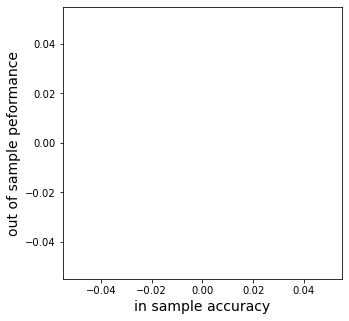

,in sample accuracy,out of sample peformance,max_leaf_nodes,min_samples_leaf,n_estimators,learning_rate,max_features,subsample
0,60.0,NaN,5.0,0.2,15.0,0.1,5.0,0.8


In [ ]:
# re-run this cell to keep adding more random models

params = {}
params["max_leaf_nodes"] = random.choice([5, 10, 20])
params["min_samples_leaf"] = random.choice([0.05, 0.1, 0.2])
params["n_estimators"] = random.choice(range(5, 101, 5))
params["learning_rate"] = random.choice(range(1, 11)) * 0.02
params["max_features"] = random.choice(range(5, 21, 5))
params["subsample"] = random.choice(range(3, 6)) * 0.2

random_model = pd.concat(
    [
        myMLfunctions.train_and_backtest(X, Y, P, RET, current_month_id, 60, params)
        for current_month_id in range(60, len(P.unique()))
    ],
    ignore_index=True,
)

all_random_models_summary.loc[random_iterations, "in sample accuracy"] = random_model[
    "insample mse"
].mean()
all_random_models_summary.loc[random_iterations, "out of sample peformance"] = (
    12 * random_model["forward return 1m"].mean()
)

for param in params:
    all_random_models_summary.loc[random_iterations, param] = params[param]

random_iterations = random_iterations + 1

plt.figure(figsize=(5, 5))
plt.scatter(
    all_random_models_summary["in sample accuracy"],
    all_random_models_summary["out of sample peformance"],
)
plt.xlabel("in sample accuracy", fontsize=14)
plt.ylabel("out of sample peformance", fontsize=14)
plt.show()
plt.close()

all_random_models_summary

<a id='tuning'></a>
### Cross validation grid

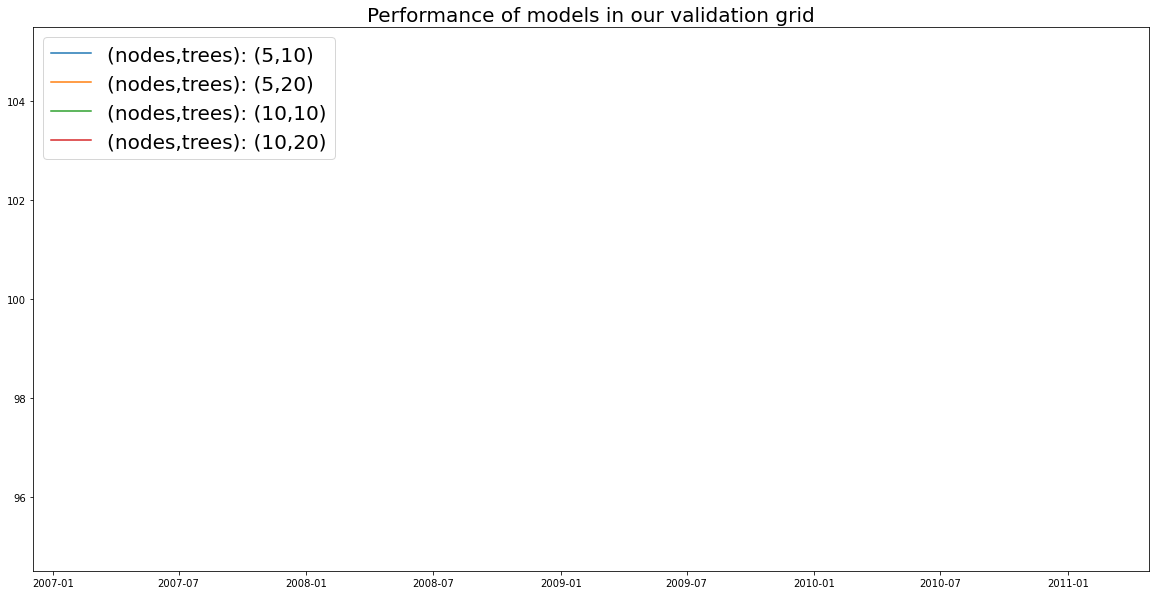

In [ ]:
validation_grid_models = []

for max_nodes in [5, 10]:
    for number_of_trees in [10, 20]:
        params = {}
        params["max_leaf_nodes"] = max_nodes
        params["min_samples_leaf"] = 0.1
        params["n_estimators"] = number_of_trees
        params["learning_rate"] = 1
        params["max_features"] = 20
        params["subsample"] = 1

        model = pd.concat(
            [
                myMLfunctions.train_and_backtest(X, Y, P, RET, current_month_id, 60, params)
                for current_month_id in range(60, len(P.unique()))
            ],
            ignore_index=True,
        )

        model.index = pd.to_datetime(model["date"].astype("int"), format="%Y%m%d")
        model = 100 * (1 + model["forward return 1m"].shift(1) / 100).cumprod()
        model.iloc[0] = 100
        model_name = "(nodes,trees): (" + str(max_nodes) + "," + str(number_of_trees) + ")"
        model = model.rename(model_name)
        validation_grid_models.append(model)

validation_grid_models = pd.concat(validation_grid_models, axis=1)

plt.figure(figsize=(20, 10))
plt.plot(validation_grid_models)
plt.legend(loc="upper left", labels=validation_grid_models, prop={"size": 20})
plt.title("Performance of models in our validation grid", fontsize=20)
plt.show()
plt.close()

### Search the grid for the best set of parameters

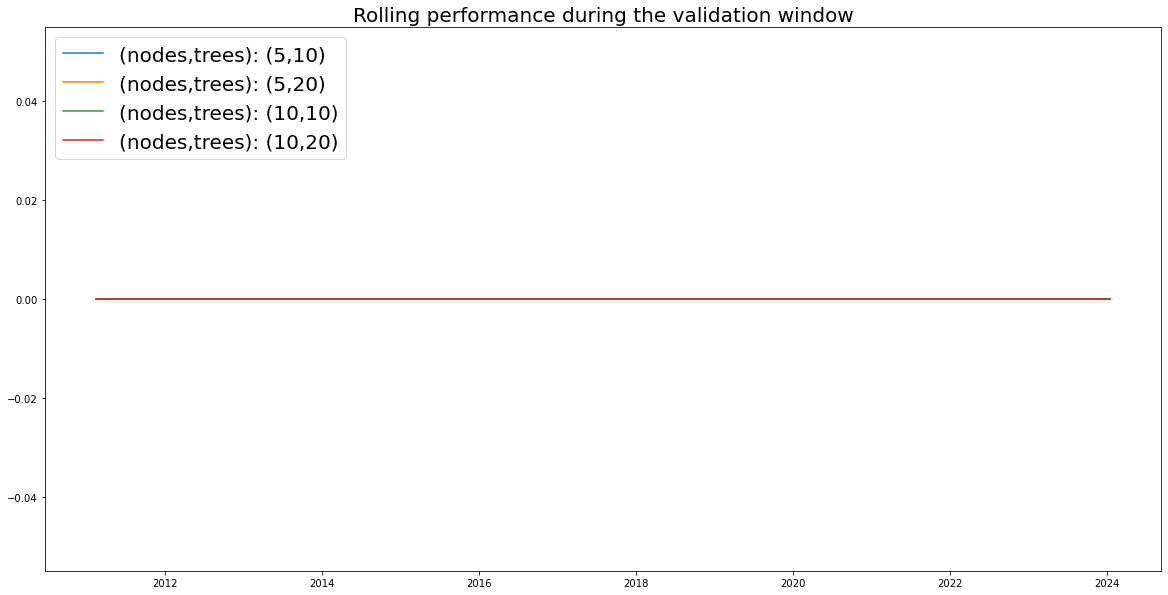

The best parameters for each period:


date
2011-02-14    (nodes,trees): (5,10)
2011-03-14    (nodes,trees): (5,10)
2011-04-14    (nodes,trees): (5,10)
2011-05-14    (nodes,trees): (5,10)
2011-06-14    (nodes,trees): (5,10)
                      ...          
2023-09-14    (nodes,trees): (5,10)
2023-10-14    (nodes,trees): (5,10)
2023-11-14    (nodes,trees): (5,10)
2023-12-14    (nodes,trees): (5,10)
2024-01-14    (nodes,trees): (5,10)
Length: 156, dtype: object

In [ ]:
number_of_validation_months = 24

plt.figure(figsize=(20, 10))
plt.plot(validation_grid_models.pct_change(periods=number_of_validation_months))
plt.legend(loc="upper left", labels=validation_grid_models, prop={"size": 20})
plt.title("Rolling performance during the validation window", fontsize=20)
plt.show()
plt.close()

print("The best parameters for each period:")
best_params = validation_grid_models.pct_change(periods=number_of_validation_months).idxmax(axis=1)
best_params.iloc[number_of_validation_months:]

<a id='backtest'></a>
## ML model performance

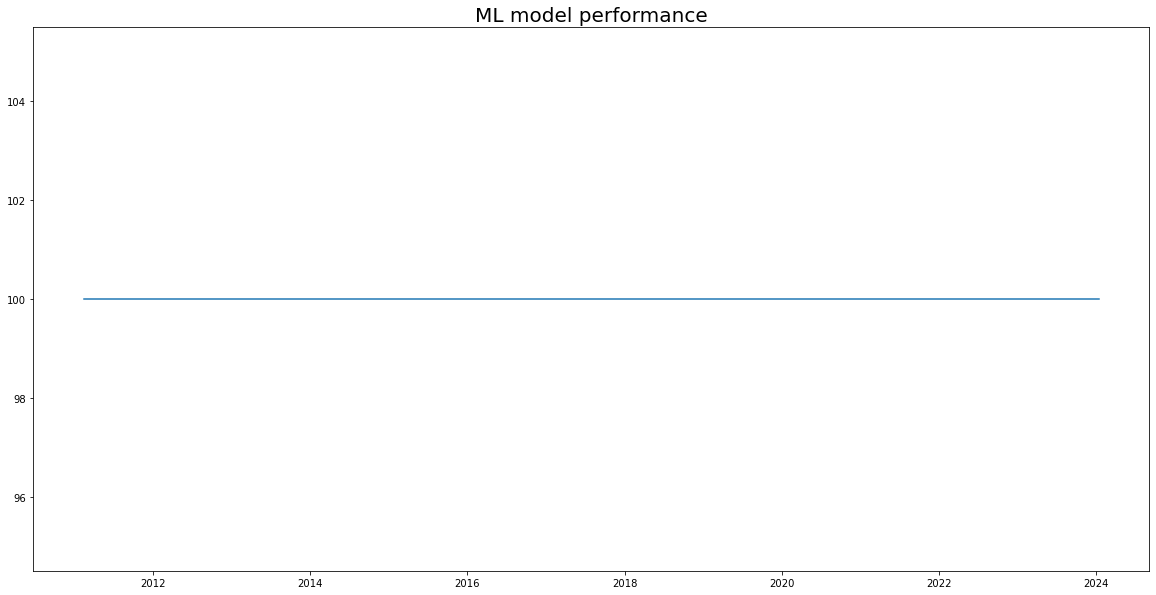

In [ ]:
#At the end of each month, we look for the best performing model over the previous 24 months
#Each model corresponds to a different set of parameters
#We use the best model to get predictions for the next month

cross_validated_model_performance = pd.Series(
    [
        validation_grid_models.pct_change(periods=1).shift(-1).loc[date, best_params[date]]
        for date in best_params.iloc[number_of_validation_months:].index
    ],
    index=best_params.iloc[number_of_validation_months:].index,
)

cross_validated_model_performance = 100 * (1 + cross_validated_model_performance.shift(1)).cumprod()
cross_validated_model_performance.iloc[0] = 100

plt.figure(figsize=(20, 10))
plt.plot(cross_validated_model_performance)
plt.title("ML model performance", fontsize=20)
plt.show()
plt.close()

### Traditional vs ML model
#### Performance of traditional equity multi-factor model

In [ ]:
multifactor_perf = myMLfunctions.backtest_top_vs_bottom_quintile(
    scores=X.mean(axis=1), forward_returns=RET, periods=P
)
valuemomentum_perf = myMLfunctions.backtest_top_vs_bottom_quintile(
    scores=X[["PE", "R12M1M"]].mean(axis=1), forward_returns=RET, periods=P
)

plt.figure(figsize=(20, 10))
plt.plot(multifactor_perf, label="multi-factor model performance")
plt.plot(valuemomentum_perf, label="value momentum model performance")
plt.legend(loc="upper right", prop={"size": 20})
plt.show()
plt.close()

KeyError: 1.0

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(cross_validated_model_performance, label="ML model performance")
plt.plot(multifactor_perf, label="Multi-factor model performance")
plt.legend(loc="upper right", prop={"size": 20})
plt.title("Not Bad!", fontsize=30)
plt.show()
plt.close()